# Data collection

In [1]:
# connect to google drive 

from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Portopolio/NLP/Narasio/WorkshopNLPNarasio-main/WorkshopNLPNarasio-main/data_lazada/data_lazada'

/content/gdrive/MyDrive/Portopolio/NLP/Narasio/WorkshopNLPNarasio-main/WorkshopNLPNarasio-main/data_lazada/data_lazada


In [3]:
!ls

20191002-items.csv  20191002-reviews.csv  categories.txt  data-stem.csv


In [4]:
import pandas as pd 

df_reviews = pd.read_csv('/content/gdrive/MyDrive/Portopolio/NLP/Narasio/WorkshopNLPNarasio-main/WorkshopNLPNarasio-main/data_lazada/data_lazada/20191002-reviews.csv')

In [5]:
df_reviews

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203782,9467899,shop-televisi-digital,Isharyanto S.,5,NaN,murah,barang bagus dengan harga kompetitif,6,6,0,True,24.63,22 Nov 2016,desktop,2019-10-02
203783,9467899,shop-televisi-digital,FIRLY B.,3,NaN,barang bagus dan sesuai pesanan,NaN,0,0,0,True,14.01,10 Apr 2018,androidApp,2019-10-02
203784,9548087,shop-televisi-digital,soni s.,5,NaN,NaN,NaN,0,0,0,True,15.63,04 Jan 2018,androidApp,2019-10-02
203785,9548767,shop-televisi-digital,Saidhusin H.,3,NaN,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,0,0,0,True,19.48,15 Nov 2016,mobile-app,2019-10-02


# Pre-processing data 

In [6]:
new_data = df_reviews[['category', 'name', 'rating', 'reviewTitle', 'reviewContent']]
new_data

,category,name,rating,reviewTitle,reviewContent
0,beli-harddisk-eksternal,Kamal U.,5,NaN,bagus mantap dah sesui pesanan
1,beli-harddisk-eksternal,yofanca m.,4,NaN,"Bagus, sesuai foto"
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood
3,beli-harddisk-eksternal,Lazada Customer,4,NaN,bagus sesuai
4,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN
...,...,...,...,...,...
203782,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif
203783,shop-televisi-digital,FIRLY B.,3,barang bagus dan sesuai pesanan,NaN
203784,shop-televisi-digital,soni s.,5,NaN,NaN
203785,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...


In [7]:
# check missing value

new_data.isnull().sum()

category              0
name                  0
rating                0
reviewTitle      180383
reviewContent     96758
dtype: int64

In [8]:
# Drop the missing value

new_data_clean = new_data.dropna()
new_data_clean

,category,name,rating,reviewTitle,reviewContent
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu..."
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?"
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..
...,...,...,...,...,...
203780,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk
203781,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...
203782,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif
203785,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...


In [9]:
# joining reviewTitle and reviewContent

new_data_clean['reviewJoin'] = new_data_clean[['reviewTitle', 'reviewContent']].apply(lambda x: ' '.join(x), axis=1)

# show data
new_data_clean

<ipython-input-9-19896be44f61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['reviewJoin'] = new_data_clean[['reviewTitle', 'reviewContent']].apply(lambda x: ' '.join(x), axis=1)


,category,name,rating,reviewTitle,reviewContent,reviewJoin
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming..."
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....
...,...,...,...,...,...,...
203780,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk
203781,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...
203782,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif
203785,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...


In [10]:
# Lower case text

new_data_clean['review_clean'] = new_data_clean['reviewJoin'].apply(lambda x: str(x).lower())

# show data
new_data_clean

<ipython-input-10-47e8cebfaa7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_clean'] = new_data_clean['reviewJoin'].apply(lambda x: str(x).lower())


,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan.. good ok...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...","barang bagus sesuai specs pesan rabu sore,ming..."
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa? mau tanya ini cicilnya pak...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv. tsb....
...,...,...,...,...,...,...,...
203780,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk
203781,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article - i got the wrong...
203782,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif
203785,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv ok.thank lazada pagi order sore b...


In [11]:
from collections import OrderedDict
import re

# cleaning data html & tag pattern with regex

html_tag = re.compile(r'<.*?>')

http_link = re.compile(r'https://\S+')
www_link = re.compile(r'wwww\.\S+')

# remove punctuations

punctuations = re.compile(r'[^\w\s]')      # symbol '^' is a notation to indicate negation where in this command means non-letter characters and not spaces

# function for cleaning data text



def data_cleaning(text):
  # remove html tag
  text = re.sub(html_tag, r'', text)

  # remove url 
  text = re.sub(http_link, r'',  text)
  text = re.sub(www_link, r'', text)

  # remove punctuations
  text = re.sub(punctuations, r'', text)

  # remove double letter
  # text = ''.join(OrderedDict.fromkeys(text))

  return text


In [12]:
# cleaning data with data_cleaning function

new_data_clean['review_clean'] = new_data_clean['review_clean'].apply(lambda x: data_cleaning(x))

# show data

new_data_clean

<ipython-input-12-6b06932f4381>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_clean'] = new_data_clean['review_clean'].apply(lambda x: data_cleaning(x))


,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...
...,...,...,...,...,...,...,...
203780,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk
203781,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article i got the wrong ...
203782,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif
203785,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv okthank lazada pagi order sore ba...


In [13]:
# view before-after preprocessing data

print ('before  : ', new_data_clean['reviewJoin'][11])
print ('----------------------------------------------')
print ('after   : ', new_data_clean['review_clean'][11])

before  :  Ini cicil pake apa? Mau tanya ini cicilnya pake apa ya,cc bkn?
----------------------------------------------
after   :  ini cicil pake apa mau tanya ini cicilnya pake apa yacc bkn


# Stemming

In [14]:
# Installing indonesian libray (Sastrawi)

!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 16.2 MB/s 


In [15]:
# import sastrawi stemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from datetime import datetime

# checking datetime
start_time = datetime.now()

# build object stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# apply the stemmer
new_data_clean['review_stem'] = new_data_clean['review_clean'].apply(lambda x: stemmer.stem(x))
new_data_clean

# how long the load process
end_time = datetime.now()
print('Waktu yang diperlukan : {}'.format(end_time - start_time))


Waktu yang diperlukan : 0:21:49.401186


<ipython-input-15-e8e8ad6d790b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_clean['review_stem'] = new_data_clean['review_clean'].apply(lambda x: stemmer.stem(x))


In [16]:
new_data_clean

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem
2,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...
7,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
9,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
11,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...
12,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...
...,...,...,...,...,...,...,...,...
203780,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk,order wkwkwk
203781,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article i got the wrong ...,wrong picture in the article i got the wrong i...
203782,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif
203785,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv okthank lazada pagi order sore ba...,akar led tv okthank lazada pagi order sore bar...


In [17]:
new_data_clean = new_data_clean.reset_index(drop=True)
new_data_clean

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...
...,...,...,...,...,...,...,...,...
21073,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk,order wkwkwk
21074,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article i got the wrong ...,wrong picture in the article i got the wrong i...
21075,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif
21076,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv okthank lazada pagi order sore ba...,akar led tv okthank lazada pagi order sore bar...


# save the file data stemming to reduce the processing data

In [ ]:
# new_data_clean.to_csv('data-stem.csv', index=False)

In [18]:
# df_stem = pd.read_csv('/content/gdrive/MyDrive/Portopolio/NLP/Narasio/WorkshopNLPNarasio-main/WorkshopNLPNarasio-main/data_lazada/data_lazada/data-stem.csv')
# df_stem

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...
...,...,...,...,...,...,...,...,...
21073,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk,order wkwkwk
21074,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article i got the wrong ...,wrong picture in the article i got the wrong i...
21075,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif
21076,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv okthank lazada pagi order sore ba...,akar led tv okthank lazada pagi order sore bar...


In [19]:
new_data_clean.head(5)

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...


# Stop Words

1. Sastrawi
2. NLTK

**Sastrawi**

In [20]:
# Import library stopword sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# make a object stopword 
factory = StopWordRemoverFactory()
list_stopword = factory.get_stop_words()

# length stopword with sastrawi
len(list_stopword)

126

In [21]:
# make a object stopword
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# apply stopword with sastrawi
new_data_clean['review_stp_sastrawi'] = new_data_clean['review_stem'].apply(lambda x: ' '.join(stopword.remove(x) for x in x.split() ))

# show data 
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...


**NLTK**

In [22]:
# Import nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# words of stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [24]:
# length of nltk stopwords
list_stopwords = set(stopwords.words('indonesian'))
len(list_stopwords)

757

In [25]:
stop = list_stopwords
new_data_clean['review_stp_nltk'] = new_data_clean['review_stem'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...,ok mantaaapppp barang sesuai pesan good okkkkk...
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima,pengirimn ntb bima bima
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...,cicil pake cicil pake yacc bkn
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...,beli cash sesuai harga tv tsb suda anti gores


# EDA

In [26]:
# import visualization library
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [27]:
new_data_clean.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...,ok mantaaapppp barang sesuai pesan good okkkkk...
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima,pengirimn ntb bima bima
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...,cicil pake cicil pake yacc bkn
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...,beli cash sesuai harga tv tsb suda anti gores


In [28]:
# set the category values
set(new_data_clean['category'])

{'beli-harddisk-eksternal',
 'beli-laptop',
 'beli-smart-tv',
 'jual-flash-drives',
 'shop-televisi-digital'}

In [29]:
# groupby data category to view rating mean
df = new_data_clean.groupby('category')['rating'].mean()

# visualizataion
fig = px.bar(df, y = df.index, x = df, color = df.index, text_auto = '.3s',
             title = 'Rating Produk')

fig.show()

In [30]:
df = new_data_clean.groupby('name')['name'].count()
df = df.sort_values(ascending=False)
df = df[:15]

fig = px.bar(df, y= df, x= df.index, text_auto= '.3s', color= df.index,
             title = 'Kategori Berita')

fig.show()

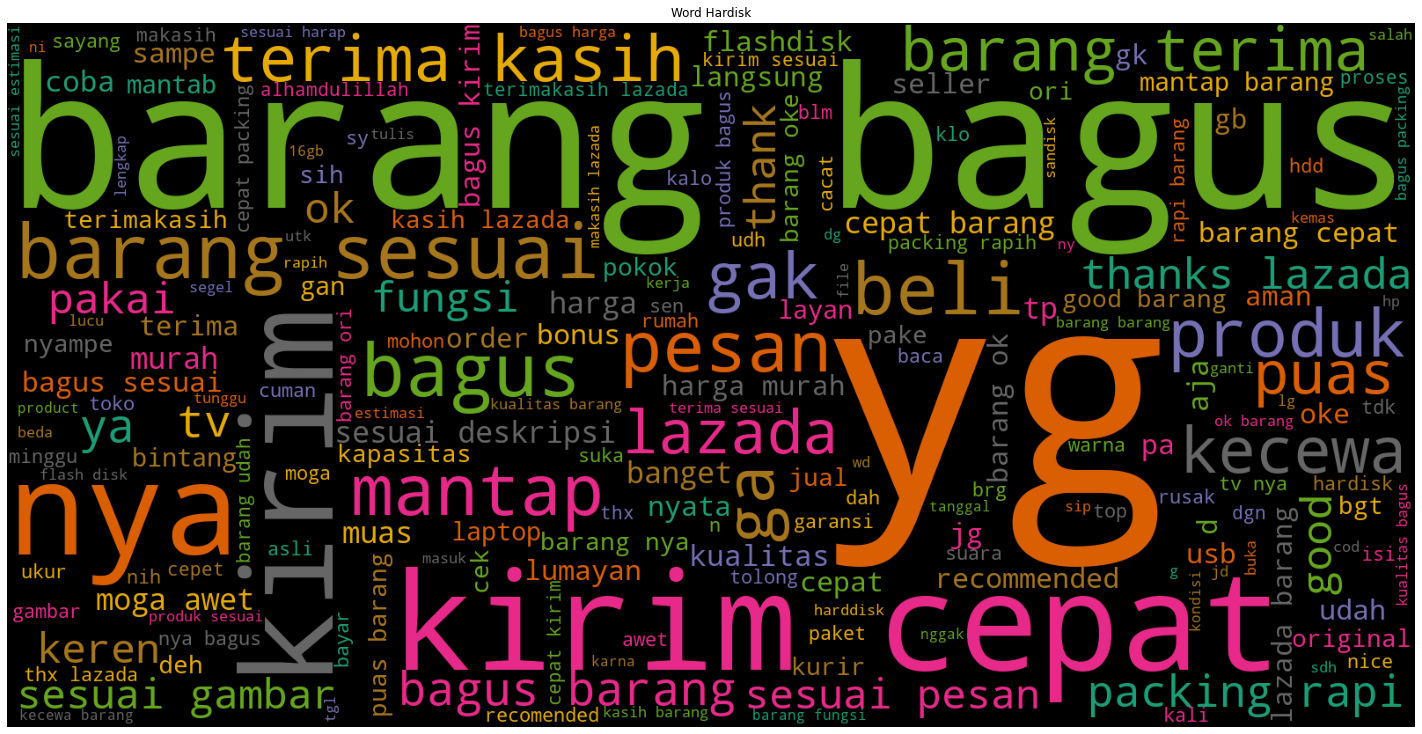

In [31]:
# wordcloud product

data_ = new_data_clean.loc[(new_data_clean['category'] == 'beli-harddisk-eksternal')]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)


# Display the generated image:
wordcloud = WordCloud(background_color='black', mode='RGB', width=1600, height=800, colormap='Dark2').generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Hardisk')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


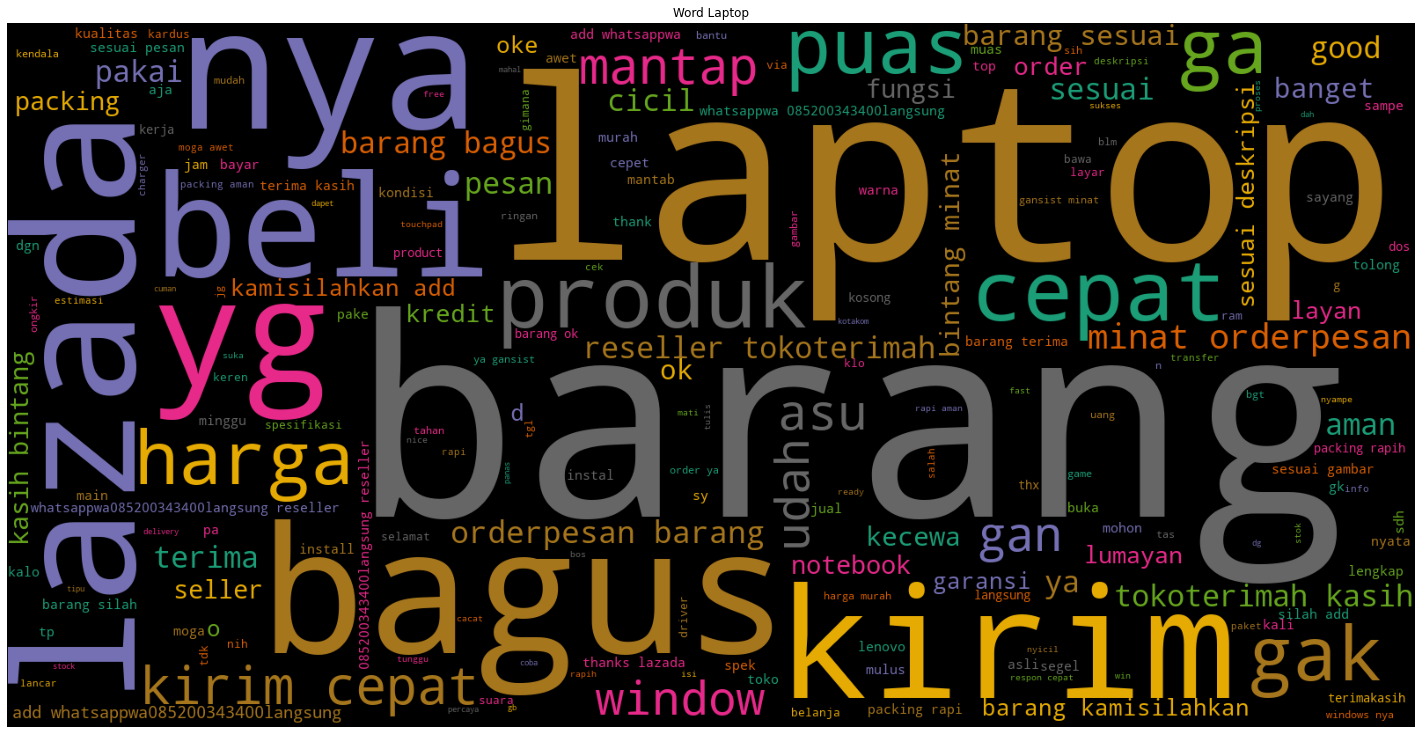

In [32]:
data_ = new_data_clean.loc[(new_data_clean['category'] == 'beli-laptop')]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode='RGB', width=1600, height=800, colormap='Dark2').generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Laptop')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

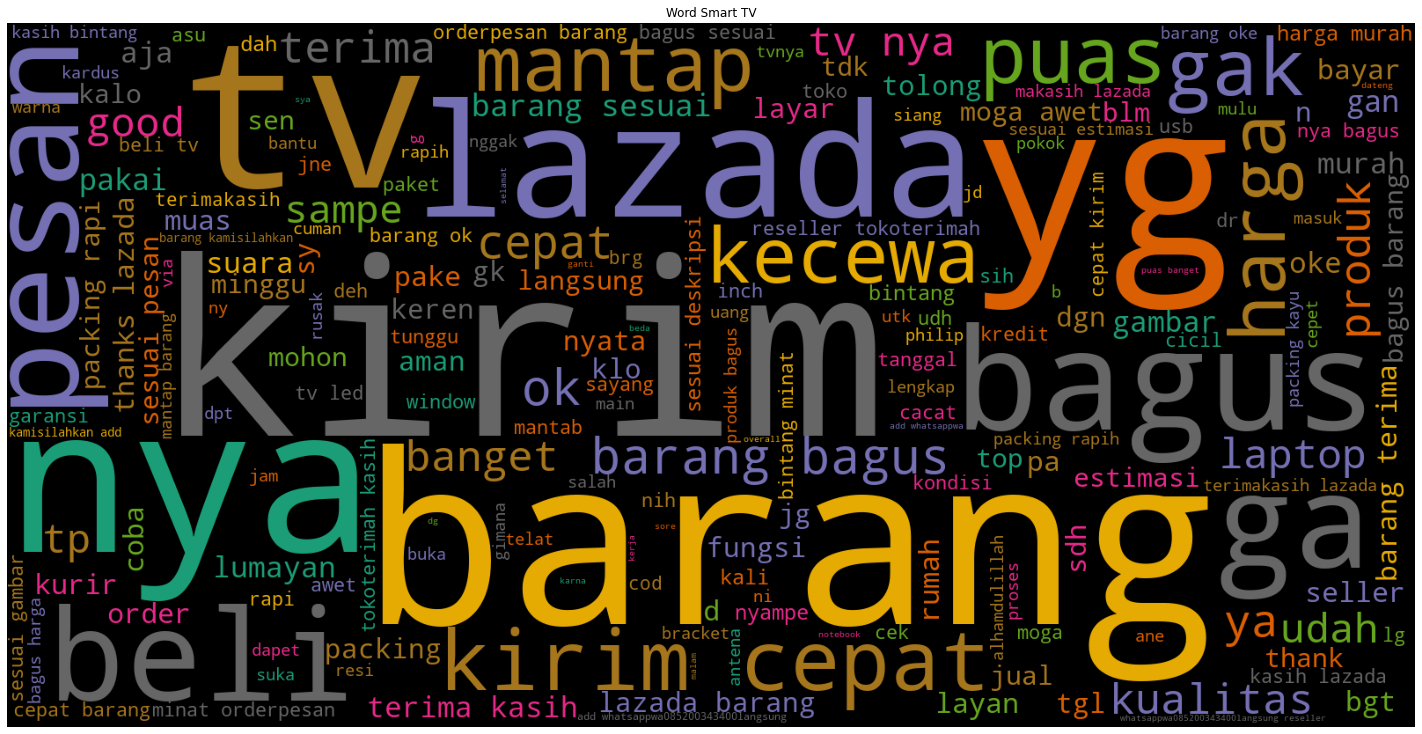

In [33]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "beli-smart-tv")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Smart TV')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

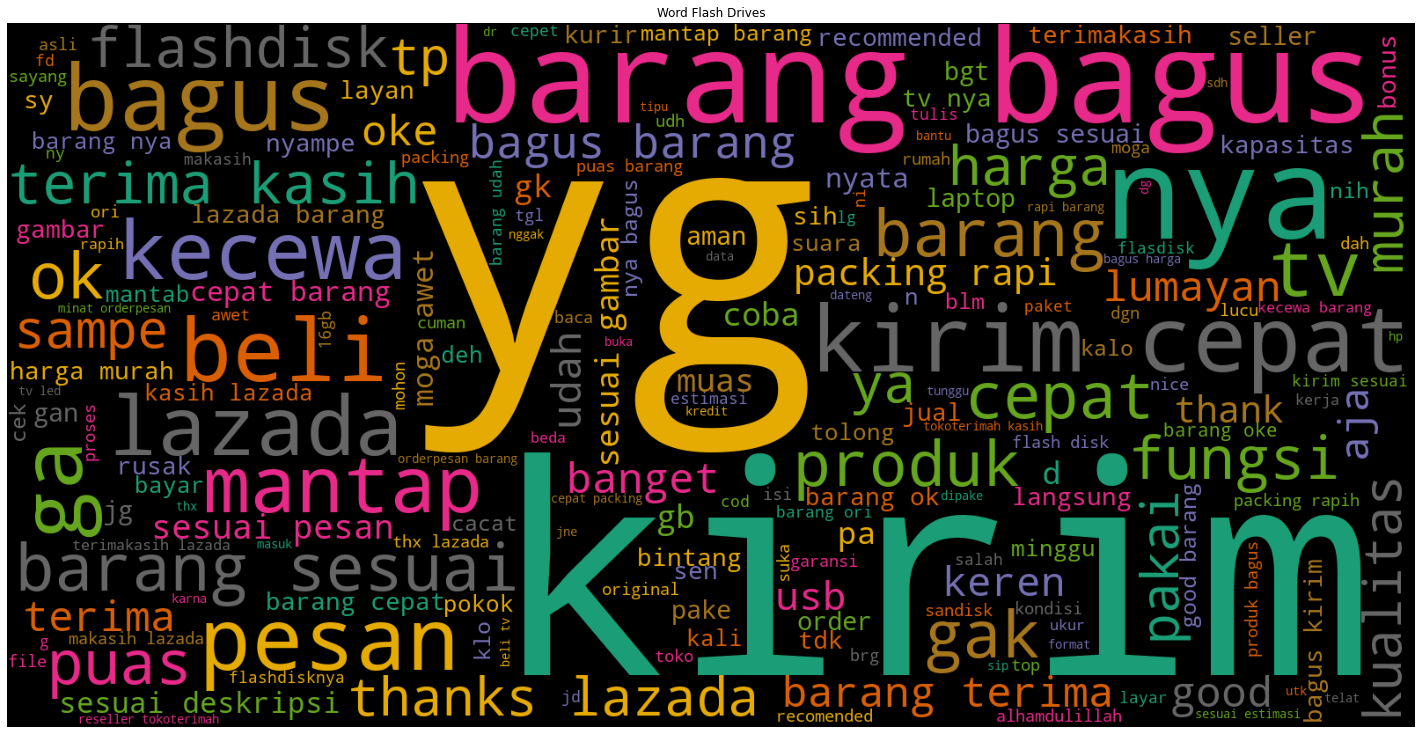

In [34]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "jual-flash-drives")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word Flash Drives')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

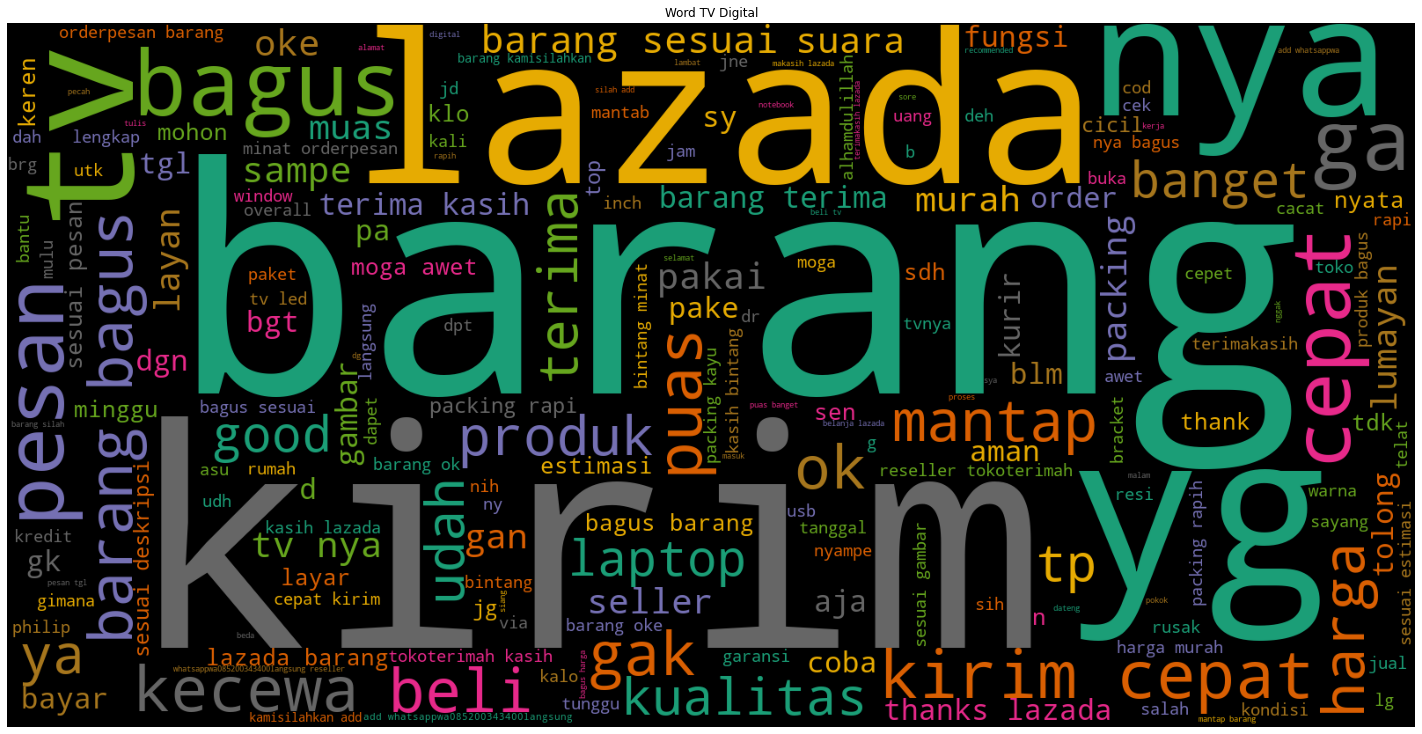

In [35]:
data_ = new_data_clean.loc[(new_data_clean['category'] == "shop-televisi-digital")]
word_ = pd.Series(' '.join(data_['review_stp_nltk']).split())
text = ' '.join(word_)

# Display the generated image:
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(20,10))
plt.title('Word TV Digital')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Label Encoder

**Using label encoder**

In [36]:
# set the rating
set(new_data_clean['rating'])

{1, 2, 3, 4, 5}

In [37]:
# build label function based on rating

def change_label (rating):
  if rating < 3 :
    return('negatif')
  elif rating == 3 :
    return('netral')
  elif rating > 3 :
    return('positif')

In [38]:
# apply the function for a new column label 

new_data_clean['label'] = new_data_clean['rating'].apply(lambda x: change_label(x))

# show the data 

new_data_clean

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk,label
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...,ok mantaaapppp barang sesuai pesan good okkkkk...,positif
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima,pengirimn ntb bima bima,negatif
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,positif
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...,cicil pake cicil pake yacc bkn,negatif
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...,beli cash sesuai harga tv tsb suda anti gores,positif
...,...,...,...,...,...,...,...,...,...,...,...
21073,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk,order wkwkwk,order wkwkwk,order wkwkwk,positif
21074,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article i got the wrong ...,wrong picture in the article i got the wrong i...,wrong picture in the article i got the wrong i...,wrong picture in the article i got the wrong i...,negatif
21075,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus harga kompetitif,murah barang bagus harga kompetitif,positif
21076,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv okthank lazada pagi order sore ba...,akar led tv okthank lazada pagi order sore bar...,akar led tv okthank lazada pagi order sore bar...,akar led tv okthank lazada pagi order sore bar...,netral


In [39]:
# Import library encoder
from sklearn.preprocessing import LabelEncoder

# encode the label with fit_transform
new_data_clean['fit_label'] = LabelEncoder().fit_transform(new_data_clean['label'])

# show data
new_data_clean

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk,label,fit_label
0,beli-harddisk-eksternal,Lazada Customer,5,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,ok mantaaapppp barang sesuai pesanan.. good ok...,ok mantaaapppp barang sesuai pesanan good okkk...,ok mantaaapppp barang sesuai pesan good okkkkk...,mantaaapppp barang sesuai pesan good okkkkk m...,ok mantaaapppp barang sesuai pesan good okkkkk...,positif,2
1,beli-harddisk-eksternal,nurfarida,1,ada pengirimn ntb bima,bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,ada pengirimn ntb bima bima,pengirimn ntb bima bima,pengirimn ntb bima bima,negatif,0
2,beli-harddisk-eksternal,agung p.,5,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...","Barang bagus sesuai specs Pesan rabu sore,ming...",barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,barang bagus sesuai specs pesan rabu soremingg...,positif,2
3,beli-harddisk-eksternal,Lazada Guest,1,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",Ini cicil pake apa? Mau tanya ini cicilnya pak...,ini cicil pake apa mau tanya ini cicilnya pake...,ini cicil pake apa mau tanya ini cicil pake ap...,cicil pake apa mau tanya cicil pake apa yacc...,cicil pake cicil pake yacc bkn,negatif,0
4,beli-harddisk-eksternal,Yan M.,5,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,Beli cash sesuai Harga di atas Apakah TV. Tsb....,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga di atas apakah tv tsb s...,beli cash sesuai harga atas tv tsb suda ant...,beli cash sesuai harga tv tsb suda anti gores,positif,2
...,...,...,...,...,...,...,...,...,...,...,...,...
21073,shop-televisi-digital,Ririnn,5,Orderan,Wkwkwk,Orderan Wkwkwk,orderan wkwkwk,order wkwkwk,order wkwkwk,order wkwkwk,positif,2
21074,shop-televisi-digital,Frank S.,1,Wrong Picture in the Article - I got the wrong...,seller incapable to keep his product page clea...,Wrong Picture in the Article - I got the wrong...,wrong picture in the article i got the wrong ...,wrong picture in the article i got the wrong i...,wrong picture in the article i got the wrong i...,wrong picture in the article i got the wrong i...,negatif,0
21075,shop-televisi-digital,Isharyanto S.,5,murah,barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus dengan harga kompetitif,murah barang bagus harga kompetitif,murah barang bagus harga kompetitif,positif,2
21076,shop-televisi-digital,Saidhusin H.,3,AKARI LED TV,Ok.thank lazada Pagi order sore barang nyampe ...,AKARI LED TV Ok.thank lazada Pagi order sore b...,akari led tv okthank lazada pagi order sore ba...,akar led tv okthank lazada pagi order sore bar...,akar led tv okthank lazada pagi order sore bar...,akar led tv okthank lazada pagi order sore bar...,netral,1


In [40]:
new_data_clean['fit_label'].value_counts()

2    15888
0     3570
1     1620
Name: fit_label, dtype: int64

**Encoder Manual**

In [41]:
# Encode manual

new_data_clean.sort_values(by=['label'], inplace=True)
new_data_clean['label_id'] = new_data_clean['label'].factorize()[0]
kategori_id_data = new_data_clean[['label', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id_data.values)
id_to_kategori = dict(kategori_id_data[['label_id', 'label']].values)

leng = kategori_id_data.label_id.values
leng = len (leng)



In [43]:
new_data_clean = new_data_clean.reset_index(drop=True)
new_data_clean

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk,label,fit_label,label_id
0,jual-flash-drives,Lazada Guest,1,Tanya barang,Barang masih ada?,Tanya barang Barang masih ada?,tanya barang barang masih ada,tanya barang barang masih ada,tanya barang barang,barang barang,negatif,0,0
1,jual-flash-drives,Devina F.,1,"Kecewa barang ga dateng""",Pesan tggl 4 januari skrg tggl 14 januari ga d...,"Kecewa barang ga dateng"" Pesan tggl 4 januari ...",kecewa barang ga dateng pesan tggl 4 januari s...,kecewa barang ga dateng pesan tggl 4 januari s...,kecewa barang ga dateng pesan tggl 4 januari s...,kecewa barang ga dateng pesan tggl 4 januari s...,negatif,0,0
2,shop-televisi-digital,sandy p.,1,Bohong,"Penipuan nih, nanti barang nya digagalkan deng...","Bohong Penipuan nih, nanti barang nya digagalk...",bohong penipuan nih nanti barang nya digagalka...,bohong tipu nih nanti barang nya gagal dengan ...,bohong tipu nih barang nya gagal alas stok b...,bohong tipu nih barang nya gagal alas stok bar...,negatif,0,0
3,shop-televisi-digital,Santo,1,Penipu ulung,Jangan sampai beli seller penipu lagi kurang s...,Penipu ulung Jangan sampai beli seller penipu ...,penipu ulung jangan sampai beli seller penipu ...,tipu ulung jangan sampai beli seller tipu lagi...,tipu ulung jangan beli seller tipu kurang st...,tipu ulung beli seller tipu stabil otak korban...,negatif,0,0
4,jual-flash-drives,Kariono Y.,1,Pelayanan gak bagus.,Saya ini pelangan setia lazada. Kalau memang ...,Pelayanan gak bagus. Saya ini pelangan setia l...,pelayanan gak bagus saya ini pelangan setia la...,layan gak bagus saya ini pelang setia lazada k...,layan gak bagus pelang setia lazada kalau me...,layan gak bagus pelang setia lazada tanggal 1 ...,negatif,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,beli-harddisk-eksternal,Lazada Guest,4,Recommended,"Mantab lah Amanah Kasih, barang sudah sampai ...","Recommended Mantab lah Amanah Kasih, barang s...",recommended mantab lah amanah kasih barang su...,recommended mantab lah amanah kasih barang sud...,recommended mantab lah amanah kasih barang ...,recommended mantab amanah kasih barang 3 serte...,positif,2,2
21074,beli-harddisk-eksternal,Lazada Guest,5,No tipu tipu,"Recommended gan, Barangnya dah sampe , bagus ...","No tipu tipu Recommended gan, Barangnya dah s...",no tipu tipu recommended gan barangnya dah sa...,no tipu tipu recommended gan barang dah sampe ...,no tipu tipu recommended gan barang dah sampe ...,no tipu tipu recommended gan barang dah sampe ...,positif,2,2
21075,beli-harddisk-eksternal,Ahmed I.,4,Oke,"Sampek nih barang, Packingan dalam box aman u...","Oke Sampek nih barang, Packingan dalam box am...",oke sampek nih barang packingan dalam box ama...,oke sampek nih barang packingan dalam box aman...,oke sampek nih barang packingan box aman bar...,oke sampek nih barang packingan box aman baran...,positif,2,2
21076,beli-harddisk-eksternal,setyo b.,5,salah beli,barang goooood,salah beli barang goooood,salah beli barang goooood,salah beli barang goooood,salah beli barang goooood,salah beli barang goooood,positif,2,2


In [44]:
new_data_clean[['fit_label', 'label_id']].value_counts()

fit_label  label_id
2          2           15888
0          0            3570
1          1            1620
dtype: int64

# Split Data

In [45]:
# import library
from sklearn.model_selection import train_test_split

# Split data
train, test = train_test_split(new_data_clean, test_size=0.25)


In [46]:
train.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk,label,fit_label,label_id
12487,beli-harddisk-eksternal,Stephan,5,Harga murah kualitas ok,kualitas ok harga bersahabat. hanya sayang pen...,Harga murah kualitas ok kualitas ok harga bers...,harga murah kualitas ok kualitas ok harga bers...,harga murah kualitas ok kualitas ok harga saha...,harga murah kualitas kualitas harga sahabat ...,harga murah kualitas ok kualitas ok harga saha...,positif,2,2
20211,beli-harddisk-eksternal,Lazada Customer,4,Sandisk 16gb,"barang sudah diterima dengan baik, sesuai deng...",Sandisk 16gb barang sudah diterima dengan baik...,sandisk 16gb barang sudah diterima dengan baik...,sandisk 16gb barang sudah terima dengan baik s...,sandisk 16gb barang terima baik sesuai desc...,sandisk 16gb barang terima sesuai description ...,positif,2,2
12046,beli-harddisk-eksternal,Adi,5,Fast,"transfer hari sabtu, hari minggu nya langsung ...","Fast transfer hari sabtu, hari minggu nya lang...",fast transfer hari sabtu hari minggu nya langs...,fast transfer hari sabtu hari minggu nya langs...,fast transfer hari sabtu hari minggu nya langs...,fast transfer sabtu minggu nya langsung sampe ...,positif,2,2
9700,jual-flash-drives,Accy G.,4,Bagus,"Barang udah nyampe, bentuknya lucu thanks lazada","Bagus Barang udah nyampe, bentuknya lucu thank...",bagus barang udah nyampe bentuknya lucu thanks...,bagus barang udah nyampe bentuk lucu thanks la...,bagus barang udah nyampe bentuk lucu thanks la...,bagus barang udah nyampe bentuk lucu thanks la...,positif,2,2
17575,beli-harddisk-eksternal,Lazada Customer,4,tepat waktu,barang sudah datang tepat waktu. rapi aman,tepat waktu barang sudah datang tepat waktu. r...,tepat waktu barang sudah datang tepat waktu ra...,tepat waktu barang sudah datang tepat waktu ra...,tepat waktu barang datang tepat waktu rapi aman,barang rapi aman,positif,2,2


In [47]:
test.head()

,category,name,rating,reviewTitle,reviewContent,reviewJoin,review_clean,review_stem,review_stp_sastrawi,review_stp_nltk,label,fit_label,label_id
2011,beli-harddisk-eksternal,Agus J.,2,bukan aslinya,ga bisa simpen video,bukan aslinya ga bisa simpen video,bukan aslinya ga bisa simpen video,bukan asli ga bisa simpen video,bukan asli ga simpen video,asli ga simpen video,negatif,0,0
2464,beli-smart-tv,Fajar W.,1,Tv nya retak di layar,Retak di layar tidak bisa berfungsi,Tv nya retak di layar Retak di layar tidak bis...,tv nya retak di layar retak di layar tidak bis...,tv nya retak di layar retak di layar tidak bis...,tv nya retak layar retak layar fungsi,tv nya retak layar retak layar fungsi,negatif,0,0
13067,beli-harddisk-eksternal,Rizqillah T.,4,Good,"Dpt harga harbolnas, lumayan murah dan kualita...","Good Dpt harga harbolnas, lumayan murah dan ku...",good dpt harga harbolnas lumayan murah dan kua...,good dpt harga harbolnas lumayan murah dan kua...,good dpt harga harbolnas lumayan murah kualit...,good dpt harga harbolnas lumayan murah kualita...,positif,2,2
4793,shop-televisi-digital,SUSY A.,3,Lumayan,Yah lumayan lah buat harga segitu... gambar je...,Lumayan Yah lumayan lah buat harga segitu... g...,lumayan yah lumayan lah buat harga segitu gamb...,lumayan yah lumayan lah buat harga segitu gamb...,lumayan yah lumayan lah buat harga segitu gamb...,lumayan yah lumayan harga segitu gambar jernih...,netral,1,1
19115,beli-harddisk-eksternal,Yuyun P.,4,Makasih,Sempat takut kemarin barang nyangkut di JNE ta...,Makasih Sempat takut kemarin barang nyangkut d...,makasih sempat takut kemarin barang nyangkut d...,makasih sempat takut kemarin barang nyangkut d...,makasih sempat takut kemarin barang nyangkut ...,makasih takut kemarin barang nyangkut jne dah ...,positif,2,2


# Feature Engineering & Modeling

**Modelling without stopwords**

In [48]:
# import library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# initialization vectorization object
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['review_stem'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# 
y_list = list(train['fit_label'])
Y_train = np.array(y_list)


In [49]:
# view train and label data

print('train data : ', X_train_tfidf.shape)
print('train label : ', Y_train.shape)

train data :  (15808, 10695)
train label :  (15808,)


In [50]:
# Import library
from sklearn.svm import SVC

start_time = datetime.now()

# Modelling with SVC

svc = SVC(kernel='linear')
svc.fit(X_train_tfidf, Y_train)

end_time = datetime.now()
print('Duration : {}'.format(end_time - start_time))

Duration : 0:00:18.259375


In [51]:
# Convert text data into numeric in test data

a = count_vect.transform(test['review_stem'])
X_test = tfidf_transformer.transform(a).toarray()
print(X_test.shape)

Y_test = list(test['fit_label'])

(5270, 10695)


In [52]:
# Predict model with Support Vector Classification

predictions_svm = svc.predict(X_test)

In [53]:
# Import library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime

# Print Accuracy SVM score 

print('SVM Accuracy Score : ', accuracy_score(predictions_svm, Y_test)*100, '%')

SVM Accuracy Score :  92.61859582542694 %


**Modeling with stopwords**

In [54]:
#x_train
count_vect = CountVectorizer()
X_train_stp_counts = count_vect.fit_transform(train['review_stp_nltk'])
tfidf_transformer = TfidfTransformer()
X_train_stp_tfidf = tfidf_transformer.fit_transform(X_train_stp_counts)

#y_train
y_list = list(train['fit_label'])
Y_train_stp = np.array(y_list)

In [55]:
# View a train and test data shape

print('train data : ', X_train_stp_tfidf.shape)
print('train label : ', Y_train_stp.shape)

train data :  (15808, 10433)
train label :  (15808,)


In [56]:
# Build a SVC model 

start_time = datetime.now()

svc_stp = SVC(kernel='linear')
svc_stp.fit(X_train_stp_tfidf, Y_train_stp)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:13.189275


In [57]:
# Convert text data into numeric in test data

a = count_vect.transform(test['review_stp_nltk'])
X_test_stp = tfidf_transformer.transform(a).toarray()
print (X_test_stp.shape)

Y_test_stp = list(test['fit_label'])

(5270, 10433)


In [58]:
# Predict model with Support Vector Classification

predictions_svm_stp = svc_stp.predict(X_test_stp)

In [59]:
# Print Accuracy SVM score 

print("SVM Accuracy Score : ",accuracy_score(predictions_svm_stp, Y_test_stp)*100,'%')

SVM Accuracy Score :  91.04364326375712 %


# Predict new data

In [60]:
text_predict = ['bagus-bagus aja sih', 'boleh lah ya', 'apaan nih barang ga sesuai banget']
df_predict = pd.DataFrame(text_predict, columns = ['text'])
df_predict

,text
0,bagus-bagus aja sih
1,boleh lah ya
2,apaan nih barang ga sesuai banget


In [61]:
# Following the text preprocess in data

df_predict['text_clean'] = df_predict['text'].apply(lambda x: str(x).lower())
df_predict['text_clean'] = df_predict['text_clean'].apply(lambda x: data_cleaning(x))
df_predict['text_stem'] = df_predict['text_clean'].apply(lambda x: stemmer.stem(x))
df_predict['text_stp_sastrawi'] = df_predict['text_stem'].apply(lambda x: ' '.join(stopword.remove(x) for x in x.split() ))
df_predict['text_stp_nltk'] = df_predict['text_stem'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))

In [62]:
df_predict

,text,text_clean,text_stem,text_stp_sastrawi,text_stp_nltk
0,bagus-bagus aja sih,bagusbagus aja sih,bagusbagus aja sih,bagusbagus aja sih,bagusbagus aja sih
1,boleh lah ya,boleh lah ya,boleh lah ya,lah,ya
2,apaan nih barang ga sesuai banget,apaan nih barang ga sesuai banget,apa nih barang ga sesuai banget,apa nih barang ga sesuai banget,nih barang ga sesuai banget


In [64]:
def predict(i):
  a = count_vect_transfor([i])
  X_coba = tfidf

In [65]:
def predict (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

def predict_stp (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    y_label = id_to_kategori[y_pred[0]]
    return (y_label)

In [66]:
df_predict['predict_label'] = df_predict['text_stem'].apply(lambda x : predict(x))
df_predict['predict_label_stp'] = df_predict['text_stem'].apply(lambda x : predict_stp(x))

In [67]:
df_predict[['text','predict_label','predict_label_stp']]

,text,predict_label,predict_label_stp
0,bagus-bagus aja sih,negatif,negatif
1,boleh lah ya,positif,positif
2,apaan nih barang ga sesuai banget,positif,positif
